<a href="https://colab.research.google.com/github/NoelleI/Pigmentation/blob/master/Melanoma_with_CNN_with_Sigmoid_4_Pigmentation_rotate_flip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma with CNN

This analysis trains a neural network to perform segmentation on melanoma data and then applies the algorithm to segment a pigmentation lesion

This line clones the github repository so that data may be accessed and the file can be saved there

In [1]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


This mounts Google Drive to access the ~10G melanoma photo data sets

1.   List item
2.   List item



In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


In [3]:
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import os
%matplotlib inline
# First, load the image
#dir_path = os.path.dirname(os.path.realpath(__file__))
filename = "./Pigmentation/pigmentation.png"

# Load the image
pigment_image = mpimg.imread(filename)

# Print out its shape
print(pigment_image.shape)


(689, 898, 3)


In [4]:
pwd

'/content'

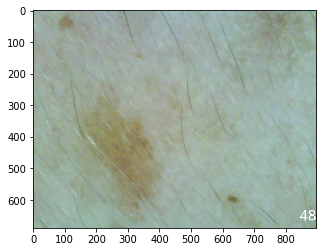

In [5]:
import matplotlib.pyplot as plt
plt.imshow(pigment_image)
plt.show()

In [6]:
pigment_image.shape

(689, 898, 3)

In [0]:
import skimage
pigment_image_resized = skimage.transform.resize(pigment_image, (192,256,3))


In [0]:
##note: in order to discern the melanin content, it will be necessary to understand how this resizing algorithm works: does it take a maximum value? What does it use?

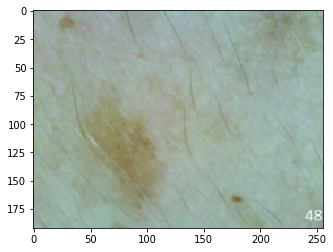

In [9]:
plt.imshow(pigment_image_resized)
plt.show()

In [10]:
type(pigment_image)

numpy.ndarray

In [0]:
import numpy as np
pigment_image_show = pigment_image_resized
pigment_image_resized = np.reshape(pigment_image_resized, [1,192,256,3])

In [12]:
import scipy
scipy.__version__

'1.0.0'

In [13]:
!pip install pillow

In [14]:
!pip uninstall scipy==1.3.0
!pip install scipy==1.0.0

Uninstalling scipy-1.0.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/scipy-1.0.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/scipy/*
Proceed (y/n)? n


In [15]:
from scipy import ndimage, misc
import re
import os
#get pigmentation photos
pigs = []
for root, dirnames, filenames in os.walk("./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"): 
    for filename in filenames:
        if re.search('d*.PNG', filename):
            filepath = os.path.join(root, filename)
            pig = ndimage.imread(filepath)
            pig_resized = skimage.transform.resize(pig, (192,256,3))  #redo this size or re-size later in Tensorflow
            pigs.append(pig_resized)
            #filename = filename.split(".")
            #name = filename[0] + "2." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #misc.imsave(new_path, _seg_resized)
            #os.remove(filepath)
            #f.close()
pigs = np.array(pigs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [16]:
filenames 

['12--10-04-pm.PNG',
 '11--10-02-pm.PNG',
 '26--11-10-am.PNG',
 '19--10-16-pm.PNG',
 '27--11-11-pm.PNG',
 '9--09-29-pm.PNG',
 '16--10-12-pm.PNG',
 '20--10-18-pm.PNG',
 '14--10-10-am.PNG',
 '2--09-23-pm.PNG',
 '17--10-13-am.PNG',
 '10--09-30-pm.PNG',
 '15--10-11-pm.PNG',
 '4--09-25-pm.PNG',
 '24--11-04-am.PNG',
 '25--11-06-pm.PNG',
 '3--09-25-am.PNG',
 '21--10-120-pm.PNG',
 '8--09-29-am.PNG',
 '0-0--09-22-pm.PNG',
 '23--10-28-pm.PNG',
 '1-1--09-23-am.PNG',
 '18--10-14-am.PNG',
 '5--09-27-pm.PNG',
 '6--09-28-am.PNG',
 '7--09-28-pm.PNG',
 '13--10-06-am.PNG',
 '22--10-25-am.PNG']

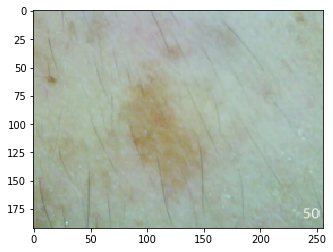

In [17]:
plt.imshow(pigs[0])


In [0]:
## I created a train-test split in the original upload of files to Google Docs, but I will merge these because I've realized that I can still use train-test split below and it will 
## randomize the photos each time

In [0]:

from skimage import data
from skimage.color import rgb2hsv

In [20]:
from scipy import ndimage, misc
import re
import os
#there are 2594 photos
images = []
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Training_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            #print(filename)
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            #rgb_img = ndimage.imread(filepath, mode="RGB")
            #hsv_img = rgb2hsv(rgb_img)
            #image = np.concat(rgb_img,hsv_img, axis =2)
            # = misc.imresize(image, (192,256,3))  #redo this size or re-size later in Tensorflow ->STORE resized images later
            images.append(image)
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            #image_resized = misc.imresize(image, (192,256,3))  #redo this size or re-size later in Tensorflow ->STORE resized images later
            images.append(image)            
            
            
            
images = np.array(images)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


In [21]:
images.shape

(2594, 192, 256, 3)

In [22]:
filenames

['ISIC_0000000f.jpg',
 'ISIC_0000000.jpg',
 'ISIC_0000007r.jpg',
 'ISIC_0000007f.jpg',
 'ISIC_0000008.jpg',
 'ISIC_0000008r.jpg',
 'ISIC_0000001f.jpg',
 'ISIC_0000007.jpg',
 'ISIC_0000001.jpg',
 'ISIC_0000000r.jpg',
 'ISIC_0000001r.jpg',
 'ISIC_0000008f.jpg',
 'ISIC_0000016.jpg',
 'ISIC_0000016f.jpg',
 'ISIC_0000024.jpg',
 'ISIC_0000028f.jpg',
 'ISIC_0000016r.jpg',
 'ISIC_0000028.jpg',
 'ISIC_0000028r.jpg',
 'ISIC_0000029f.jpg',
 'ISIC_0000025.jpg',
 'ISIC_0000025r.jpg',
 'ISIC_0000025f.jpg',
 'ISIC_0000024f.jpg',
 'ISIC_0000024r.jpg',
 'ISIC_0000029r.jpg',
 'ISIC_0000029.jpg',
 'ISIC_0000031.jpg',
 'ISIC_0000031f.jpg',
 'ISIC_0000031r.jpg',
 'ISIC_0000038.jpg',
 'ISIC_0000044f.jpg',
 'ISIC_0000041.jpg',
 'ISIC_0000041r.jpg',
 'ISIC_0000041f.jpg',
 'ISIC_0000044.jpg',
 'ISIC_0000038f.jpg',
 'ISIC_0000038r.jpg',
 'ISIC_0000044r.jpg',
 'ISIC_0000051f.jpg',
 'ISIC_0000051.jpg',
 'ISIC_0000051r.jpg',
 'ISIC_0000053.jpg',
 'ISIC_0000059f.jpg',
 'ISIC_0000059r.jpg',
 'ISIC_0000059.jpg',
 'IS

In [23]:
len(images)

2594

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


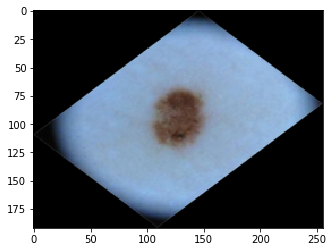

In [24]:
image = images[2580,:,:,:]
rotate_image = ndimage.rotate(image, 45)
rotate_image = misc.imresize(rotate_image, (192,256,3))
plt.imshow(rotate_image)
plt.show()

***The images look blurry***

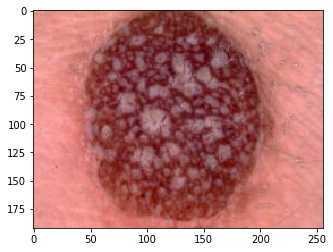

In [25]:
image = images[0,:,:,:]
plt.imshow(image)
plt.show()

In [26]:
filepath

'/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches/batch0/ISIC_0000059.jpg'

In [27]:
image.shape

(192, 256, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


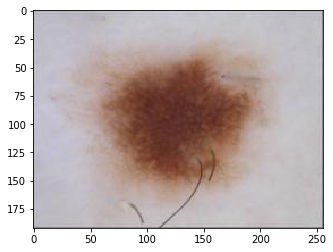

In [28]:
image = ndimage.imread(filepath, mode="RGB")
plt.imshow(image)
plt.show()

In [29]:
#C:/Users\Admin\Documents\Skin Depth\Leads and Projects\Melanoma Challenge\2018\ISIC2018_Task1_Training_GroundTruth\ISIC2018_Task1_Training_GroundTruth
segs = []
files = []
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"):  #"/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #C:/Users/Admin/Documents/Skin Depth/Leads and Projects/Melanoma Challenge/2018/ISIC2018_Task1_Training_GroundTruth/ISIC2018_Task1_Training_GroundTruth"): 
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
            print(filename)
            files.append(filename)
            filepath = os.path.join(root, filename)
            seg = ndimage.imread(filepath, mode="L")
            #seg_resized = misc.imresize(seg, (192,256,3))
            segs.append(seg)
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Testing_GroundTruth_batches"):  #"/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #C:/Users/Admin/Documents/Skin Depth/Leads and Projects/Melanoma Challenge/2018/ISIC2018_Task1_Training_GroundTruth/ISIC2018_Task1_Training_GroundTruth"): 
    for filename in filenames:
       if re.search('d*[^{r|f}]_segmentation.png', filename):
            files.append(filename)
            filepath = os.path.join(root, filename)
            seg = ndimage.imread(filepath, mode="L")
            #seg_resized = misc.imresize(seg, (192,256,3))
            segs.append(seg)   
segs = np.array(segs)


ISIC_0014897_segmentation.png
ISIC_0014903_segmentation.png
ISIC_0014901_segmentation.png
ISIC_0014898_segmentation.png
ISIC_0014907_segmentation.png
ISIC_0014910_segmentation.png
ISIC_0014915_segmentation.png
ISIC_0014911_segmentation.png
ISIC_0014912_segmentation.png
ISIC_0014919_segmentation.png
ISIC_0014920_segmentation.png
ISIC_0014926_segmentation.png
ISIC_0014922_segmentation.png
ISIC_0014925_segmentation.png
ISIC_0014927_segmentation.png
ISIC_0014928_segmentation.png
ISIC_0014929_segmentation.png
ISIC_0014930_segmentation.png
ISIC_0014931_segmentation.png
ISIC_0014936_segmentation.png
ISIC_0014933_segmentation.png
ISIC_0014937_segmentation.png
ISIC_0014938_segmentation.png
ISIC_0014940_segmentation.png
ISIC_0014942_segmentation.png
ISIC_0014943_segmentation.png
ISIC_0014945_segmentation.png
ISIC_0014944_segmentation.png
ISIC_0014947_segmentation.png
ISIC_0014955_segmentation.png
ISIC_0014948_segmentation.png
ISIC_0014951_segmentation.png
ISIC_0014838_segmentation.png
ISIC_00148

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':


ISIC_0015008_segmentation.png
ISIC_0015013_segmentation.png
ISIC_0015018_segmentation.png
ISIC_0015020_segmentation.png
ISIC_0015030_segmentation.png
ISIC_0015021_segmentation.png
ISIC_0015023_segmentation.png
ISIC_0015031_segmentation.png
ISIC_0015040_segmentation.png
ISIC_0015035_segmentation.png
ISIC_0015032_segmentation.png
ISIC_0015041_segmentation.png
ISIC_0014763_segmentation.png
ISIC_0014762_segmentation.png
ISIC_0014765_segmentation.png
ISIC_0014769_segmentation.png
ISIC_0014771_segmentation.png
ISIC_0014770_segmentation.png
ISIC_0014772_segmentation.png
ISIC_0014773_segmentation.png
ISIC_0014779_segmentation.png
ISIC_0014775_segmentation.png
ISIC_0014778_segmentation.png
ISIC_0014780_segmentation.png
ISIC_0014783_segmentation.png
ISIC_0014786_segmentation.png
ISIC_0014784_segmentation.png
ISIC_0014787_segmentation.png
ISIC_0014792_segmentation.png
ISIC_0014794_segmentation.png
ISIC_0014802_segmentation.png
ISIC_0014806_segmentation.png
ISIC_0014803_segmentation.png
ISIC_00148

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


**Check some features of the data to be sure that it uploaded properly**

In [30]:
segs.shape


(2594, 192, 256)

In [31]:
len(files)

2594

In [32]:
segs[-1].shape

(192, 256)

In [33]:
images.shape

(2594, 192, 256, 3)

In [34]:
filename = filenames[3]
filepath = os.path.join(root, filename)
seg = ndimage.imread(filepath, mode="L")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
seg.shape

(192, 256)

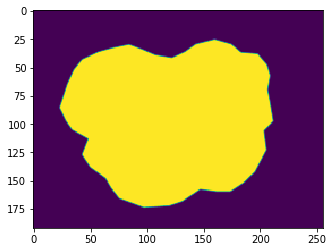

In [36]:
image = segs[2593,:,:]
plt.imshow(image)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


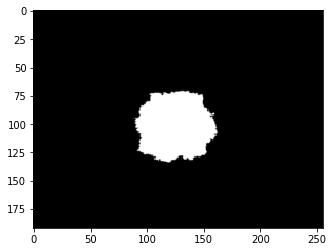

In [37]:
image = image = ndimage.imread(filepath, mode="RGB")
plt.imshow(image)
plt.show()

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [0]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.05) #this is randomized each time the program is started and run from scratch

In [39]:
trainim.shape

(2464, 192, 256, 3)

In [40]:
np.max(testlab)

255

In [41]:
testlab.shape

(130, 192, 256)

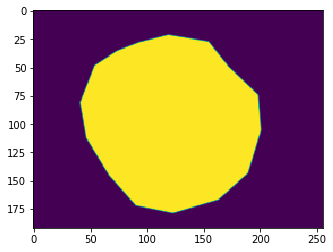

In [42]:
image = trainlab[5,:,:]
plt.imshow(image)
plt.show()

In [0]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        ###Not Needed####
        # Vertically stacks the training images
        #self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])  #insert images here, make sure they are 
        #vetically stacked##
        #train_len = len(self.training_images)
        
        # Reshapes and normalizes training images
        self.training_images = trainim/255   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the training labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        
        ##May need to replace this with code that rounds a humber to 0 or 1 for the mask ##
        self.training_labels = np.around(trainlab/255) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        # Vertically stacks the test images
        #self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        #test_len = len(self.test_images)
        
        # Reshapes and normalizes test images
        self.test_images = testim/255 #self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the test labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = np.around(testlab/255).reshape(-1,192*256) #one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100 - this is now a mistake
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<batch_size and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3)  #why is this necessary?
            y = np.vstack((self.training_labels[self.i:self.i+batch_size].reshape(-1,192*256), self.training_labels[0:xtra].reshape(-1,192*256)))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3)  #why is this necessary?
            y = self.training_labels[self.i:self.i+batch_size].reshape(-1,192*256)
        
        self.i = xtra 
        return x, y

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def deconv2d(x, shape):
    return tf.layers.conv2d_transpose(x, shape[3], shape[0:2], padding = 'SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [0]:
def convolutional_layer(input_x, shape):
    if input_x.shape[0]==1:
      training = False
    else: training = True
    W = init_weights(shape)
    b = init_bias([shape[3]])
    c = conv2d(input_x, W) + b   ###put batch normalization here because it should include the weights
    bnc = tf.layers.batch_normalization(c, training = training)
    return tf.nn.relu(bnc)

This is a normal fully connected layer

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
def deconvolutional_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    bnd = tf.layers.batch_normalization(d, training = training)
    return tf.nn.relu(bnd)

In [0]:
def output_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    
    return tf.nn.sigmoid(d)

### Placeholders

In [0]:
x = tf.placeholder(tf.float32,shape=[None,192,256,3])  #trace the shaping of these through the code...


In [0]:

y_true = tf.placeholder(tf.float32,shape=[None,192*256])  #this now has every pixel in the ground truth segmentation

### Layers

In [0]:
x_image = tf.reshape(x,[-1,192,256,3])  #-1 infers the shape of the first dimension (here, the batch size)

In [56]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,3,16])
convo_12 = convolutional_layer(convo_1,shape=[3,3,16,32])
convo_1_pooling = max_pool_2by2(convo_12)

W0619 03:59:56.668557 140422485043072 deprecation.py:323] From <ipython-input-49-76880a92fd32>:8: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


In [57]:
print(convo_1_pooling.shape)

(?, 96, 128, 32)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,32,64])
convo_22 = convolutional_layer(convo_2,shape=[3,3,64,64])
convo_2_pooling = max_pool_2by2(convo_22)

In [59]:
print(convo_2_pooling.shape)

(?, 48, 64, 64)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
## You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_32 = convolutional_layer(convo_3,shape=[3,3,128,128])
convo_3_pooling = max_pool_2by2(convo_32)

In [61]:
print(convo_3_pooling.shape)

(?, 24, 32, 128)


In [62]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
hold_prob = tf.placeholder(tf.float32)

convo_3_pooling_d = tf.nn.dropout(convo_3_pooling,keep_prob=hold_prob)


convo_4 = convolutional_layer(convo_3_pooling_d,shape=[3,3,128,256])
convo_42 = convolutional_layer(convo_4,shape=[3,3,256,256])
convo_4_pooling = max_pool_2by2(convo_42)

W0619 03:59:57.125716 140422485043072 deprecation.py:506] From <ipython-input-62-106ed5149670>:3: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [63]:
print(convo_4_pooling.shape)

(?, 12, 16, 256)


In [0]:
convo_5 = convolutional_layer(convo_4_pooling,shape=[3,3,256,512])
#convo_5_pooling = max_pool_2by2(convo_5)

In [65]:
print(convo_5.shape)

(?, 12, 16, 512)


In [0]:
#convo_6 = convolutional_layer(convo_5,shape=[3,3,128,256])
#convo_6_pooling = max_pool_2by2(convo_6)

In [0]:
#print(convo_6.shape)

###Need to look at the shapes and sizes of all of these layers###

In [68]:
#import keras
deconv_1 = deconvolutional_layer(convo_5, shape = [3,3,512,256])
H = deconv_1.shape[1]
W = deconv_1.shape[2]
ups_1 = tf.image.resize_nearest_neighbor(deconv_1, size = [2*H,2*W])
print(ups_1.shape)

W0619 03:59:57.384139 140422485043072 deprecation.py:323] From <ipython-input-47-68bfa008f209>:2: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
W0619 03:59:57.392947 140422485043072 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(?, 24, 32, 256)


In [69]:
deconv_2 = deconvolutional_layer(ups_1, shape = [3,3,256,256])
deconv_22 = deconvolutional_layer(deconv_2, shape = [3,3,256,128])
H = deconv_22.shape[1]
W = deconv_22.shape[2]
ups_2 = tf.image.resize_nearest_neighbor(deconv_22, size = [2*H,2*W])
print(ups_2.shape)

(?, 48, 64, 128)


In [70]:
deconv_3 = deconvolutional_layer(ups_2, shape = [4,4,128,128])
deconv_32 = deconvolutional_layer(deconv_3, shape = [3,3,128,128])
H = deconv_32.shape[1]
W = deconv_32.shape[2]
ups_3 = tf.image.resize_nearest_neighbor(deconv_32, size = [2*H,2*W])
print(ups_3.shape)

(?, 96, 128, 128)


In [71]:
deconv_4 = deconvolutional_layer(ups_3, shape = [3,3,128,64])
deconv_42 = deconvolutional_layer(deconv_4, shape = [3,3,64,32])
H = deconv_42.shape[1]
W = deconv_42.shape[2]
ups_4 = tf.image.resize_nearest_neighbor(deconv_42, size = [2*H,2*W])
print(ups_4.shape)

(?, 192, 256, 32)


In [72]:
hold_prob2 = tf.placeholder(tf.float32)

ups_4_d = tf.nn.dropout(ups_4,keep_prob=hold_prob2)

deconv_5 = deconvolutional_layer(ups_4_d, shape = [3,3,32,16])
print(deconv_5.shape)
output = output_layer(deconv_5, shape = [3,3,16,1])
#print(deconv_52.shape)
#output = tf.image.resize_nearest_neighbor(deconv_52, size = [192,256])   #not sure what sort of output layer is used in the winning submission

(?, 192, 256, 16)


In [73]:
deconv_5.shape

TensorShape([Dimension(None), Dimension(192), Dimension(256), Dimension(16)])

In [0]:
y_pred = output

### Loss Function

In [0]:
pred = tf.reshape(y_pred, [-1,192,256])
true = tf.reshape(y_true, [-1,192,256])
          

#intersect = tf.reduce_sum(tf.cast(true*pred, tf.float32), axis = [1,2])
#sum_pred = tf.reduce_sum(tf.cast(pred*pred, tf.float32), axis = [1,2])
#sum_true = tf.reduce_sum(tf.cast(true*true, tf.float32), axis = [1,2])
#union = sum_pred + sum_true - intersect  
#jacc = intersect/union
            


cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred))

This will be updated to a loss function based on the jaccard index, as in the related publication

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
#cost = -tf.reduce_mean(tf.nn.sigmoid(jacc))
train = optimizer.minimize(cross_entropy)   #can this be done for each pixel?

### Intialize Variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

### Session

In [79]:
mel = MelHelper()
mel.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [80]:
tf.math.exp(1.)

<tf.Tensor 'Exp:0' shape=() dtype=float32>

starting init
done init
Currently on step 0
the time is  4.066991000000002 

Avg Jacc is:


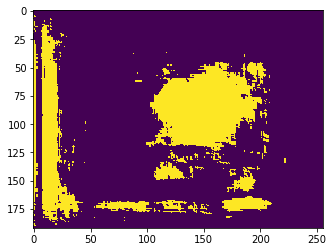

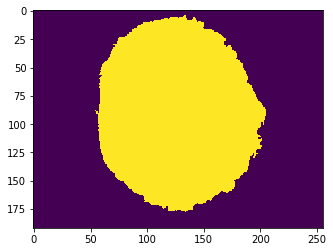

0.15959773430457483  step number is  0  batch_size is  16
Currently on step 100
the time is  41.14462 

Avg Jacc is:


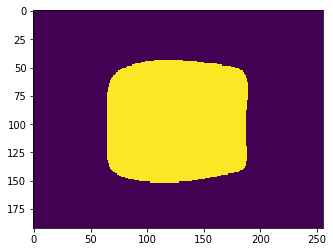

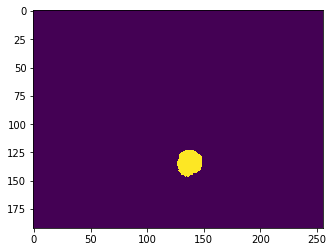

0.37415621830866885  step number is  100  batch_size is  16
Currently on step 200
the time is  72.428007 

Avg Jacc is:


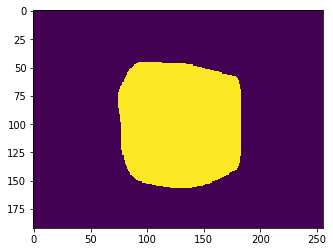

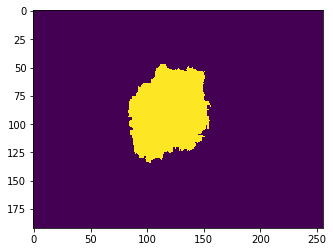

0.42223141009990983  step number is  200  batch_size is  16
Currently on step 300
the time is  103.70439599999999 

Avg Jacc is:


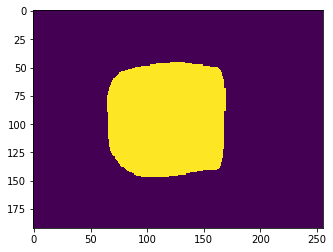

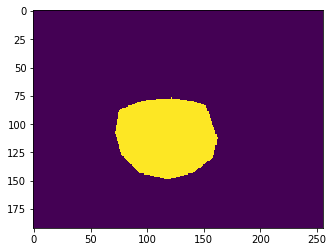

0.42171143751878004  step number is  300  batch_size is  16
Currently on step 400
the time is  134.993543 

Avg Jacc is:


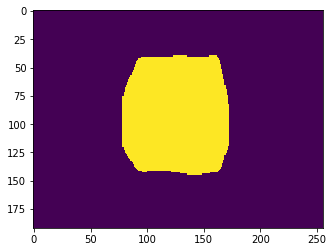

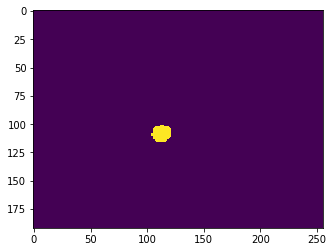

0.4147786067082332  step number is  400  batch_size is  16
Currently on step 500
the time is  166.252228 

Avg Jacc is:


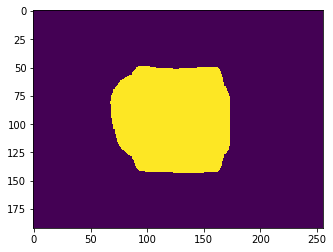

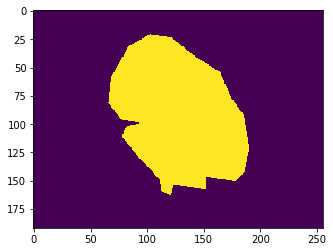

0.4170799255371094  step number is  500  batch_size is  16
Currently on step 600
the time is  197.56716999999998 

Avg Jacc is:


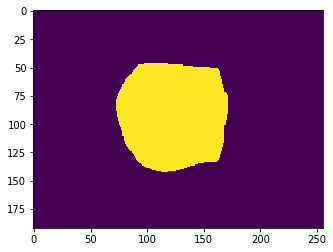

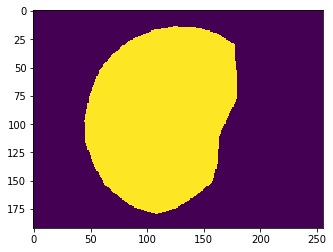

0.41675068781926083  step number is  600  batch_size is  16
Currently on step 700
the time is  228.89675800000003 

Avg Jacc is:


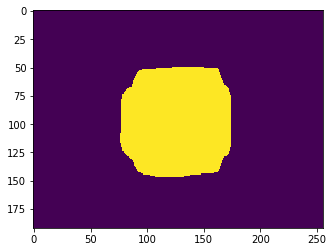

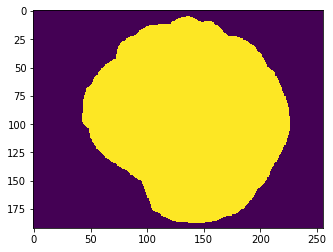

0.4187638502854567  step number is  700  batch_size is  16
Currently on step 800
the time is  260.28398300000003 

Avg Jacc is:


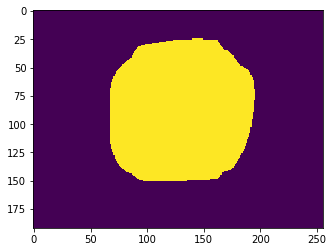

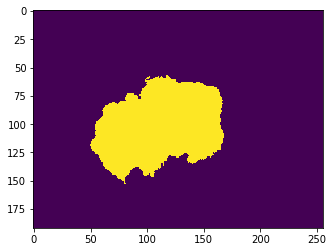

0.4198812044583834  step number is  800  batch_size is  16
Currently on step 900
the time is  291.590434 

Avg Jacc is:


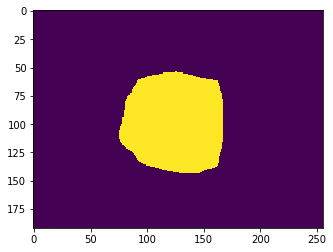

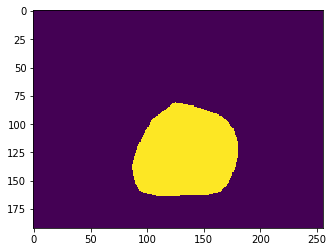

0.40602452204777645  step number is  900  batch_size is  16
Currently on step 1000
the time is  322.88869500000004 

Avg Jacc is:


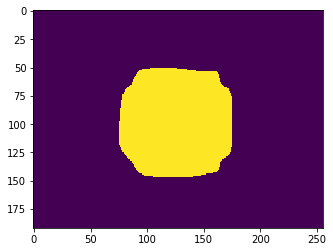

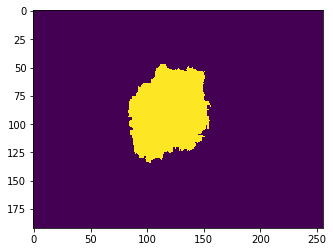

0.41749874995304986  step number is  1000  batch_size is  16
Currently on step 1100
the time is  354.207685 

Avg Jacc is:


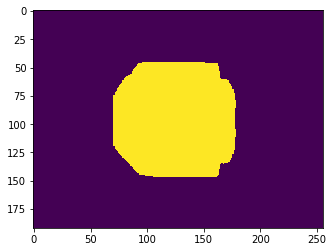

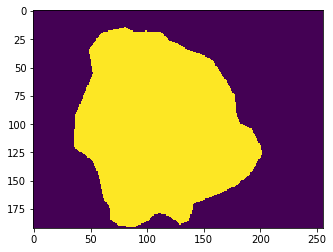

0.4165989215557392  step number is  1100  batch_size is  16
Currently on step 1200
the time is  385.46841 

Avg Jacc is:


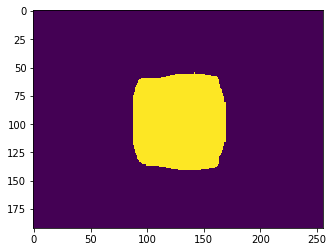

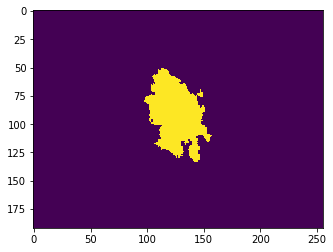

0.4134273822490986  step number is  1200  batch_size is  16
Currently on step 1300
the time is  416.671946 

Avg Jacc is:


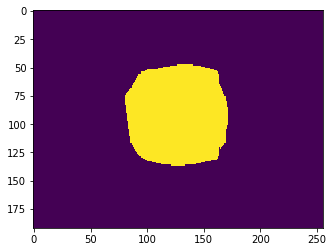

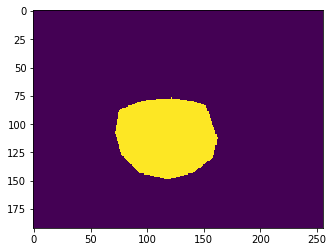

0.4120619553786058  step number is  1300  batch_size is  16
Currently on step 1400
the time is  447.85659200000003 

Avg Jacc is:


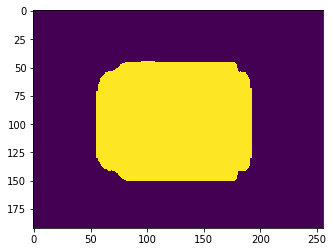

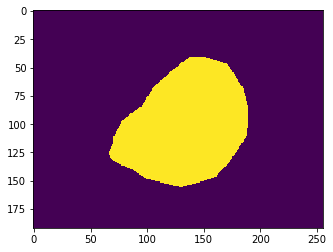

0.42555952805739183  step number is  1400  batch_size is  16
Currently on step 1500
the time is  479.102289 

Avg Jacc is:


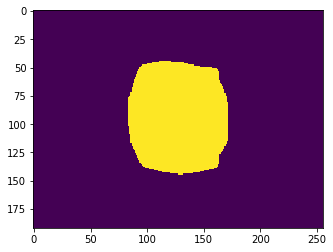

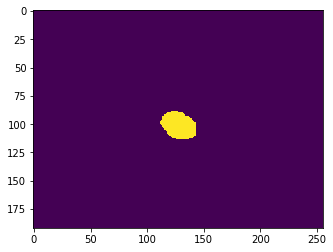

0.41910400390625  step number is  1500  batch_size is  16
Currently on step 1600
the time is  510.348408 

Avg Jacc is:


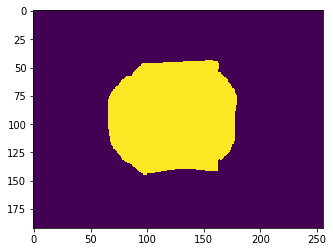

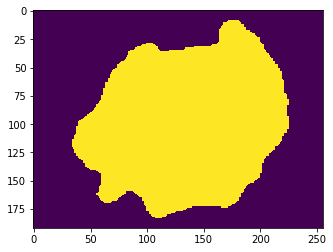

0.42064012380746696  step number is  1600  batch_size is  16
Currently on step 1700
the time is  541.5478119999999 

Avg Jacc is:


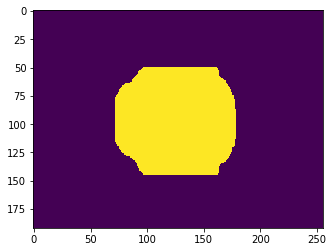

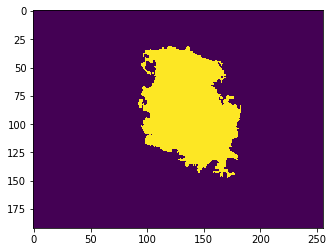

0.4247090853177584  step number is  1700  batch_size is  16
Currently on step 1800
the time is  572.797516 

Avg Jacc is:


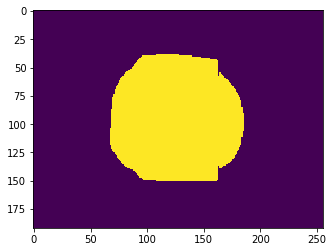

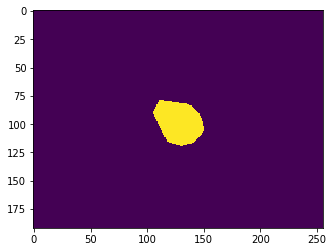

0.4225235572228065  step number is  1800  batch_size is  16
Currently on step 1900
the time is  604.027643 

Avg Jacc is:


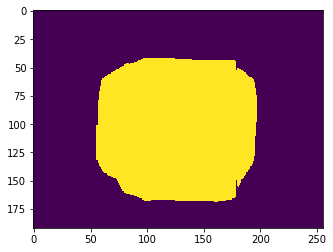

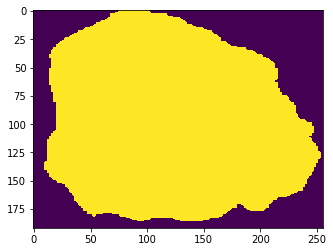

0.4189976031963642  step number is  1900  batch_size is  16
Currently on step 2000
the time is  635.367676 

Avg Jacc is:


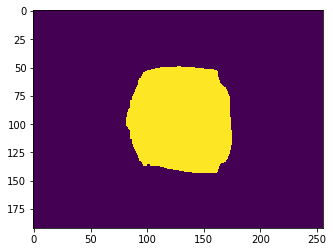

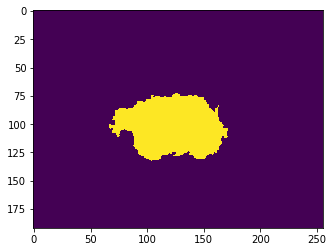

0.4248508746807392  step number is  2000  batch_size is  16
Currently on step 2100
the time is  666.840571 

Avg Jacc is:


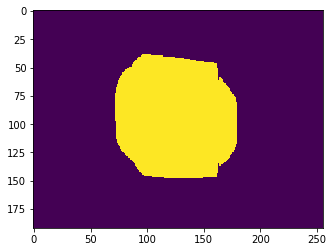

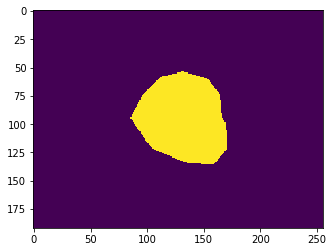

0.42146673936110274  step number is  2100  batch_size is  16
Currently on step 2200
the time is  698.0868879999999 

Avg Jacc is:


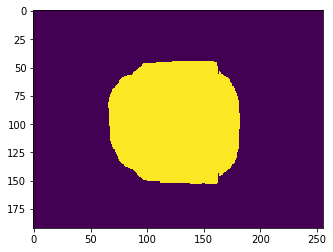

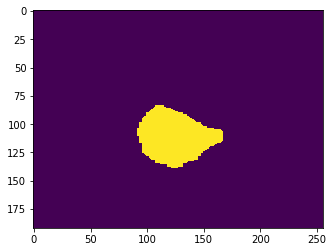

0.41893028846153846  step number is  2200  batch_size is  16
Currently on step 2300
the time is  729.26082 

Avg Jacc is:


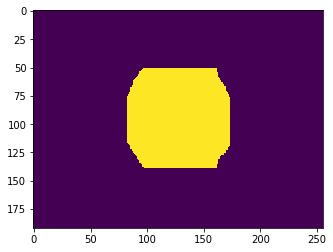

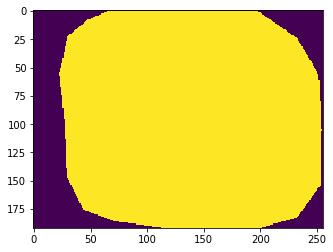

0.4227420513446514  step number is  2300  batch_size is  16
Currently on step 2400
the time is  760.513211 

Avg Jacc is:


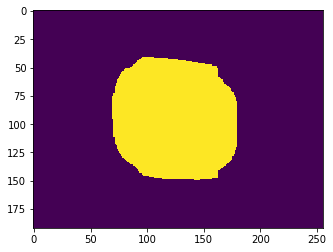

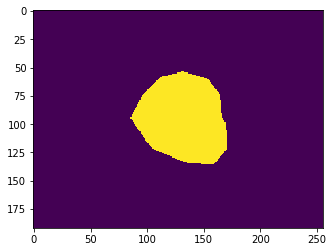

0.4196694007286659  step number is  2400  batch_size is  16
Currently on step 2500
the time is  791.79446 

Avg Jacc is:


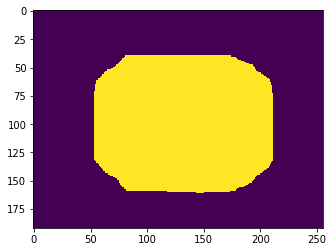

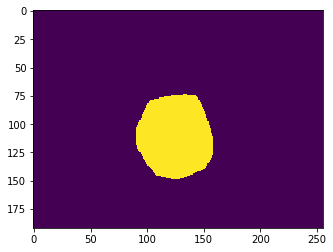

0.42003543560321516  step number is  2500  batch_size is  16
Currently on step 2600
the time is  823.0137599999999 

Avg Jacc is:


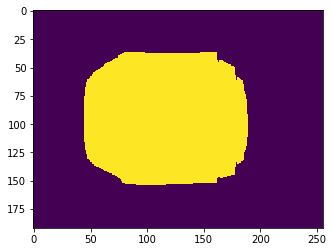

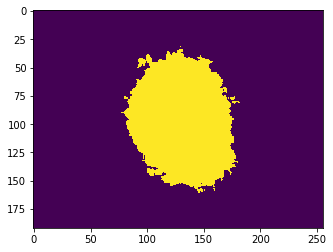

0.4097197899451623  step number is  2600  batch_size is  16
Currently on step 2700
the time is  854.306261 

Avg Jacc is:


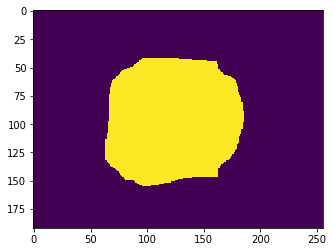

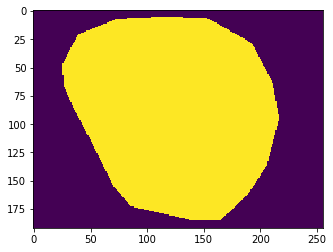

0.418207520705003  step number is  2700  batch_size is  16
Currently on step 2800
the time is  885.543859 

Avg Jacc is:


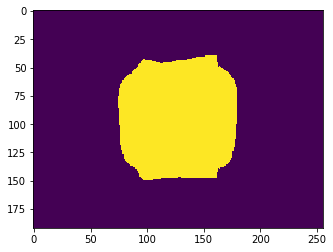

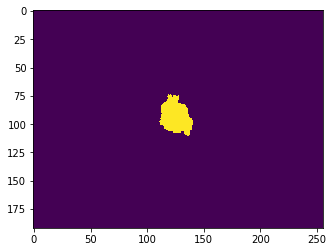

0.4230945293719952  step number is  2800  batch_size is  16
Currently on step 2900
the time is  916.767534 

Avg Jacc is:


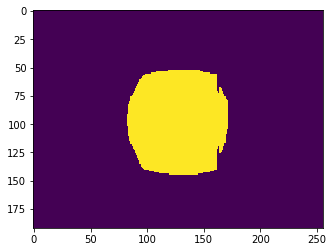

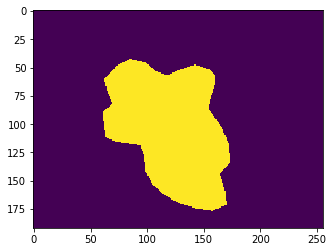

0.4130333533653846  step number is  2900  batch_size is  16
Currently on step 3000
the time is  948.064036 

Avg Jacc is:


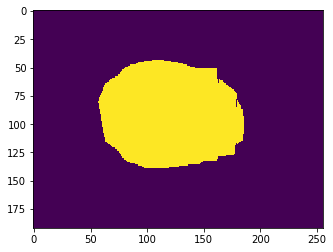

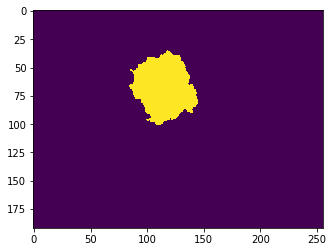

0.4188701923076923  step number is  3000  batch_size is  16
Currently on step 3100
the time is  979.328258 

Avg Jacc is:


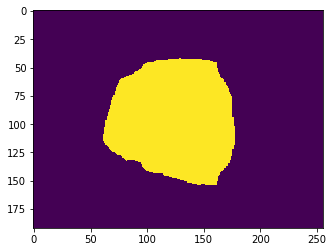

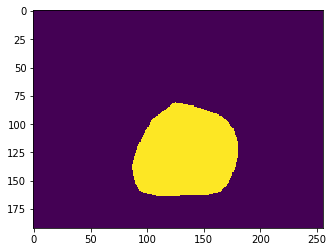

0.42009418194110576  step number is  3100  batch_size is  16
Currently on step 3200
the time is  1010.622208 

Avg Jacc is:


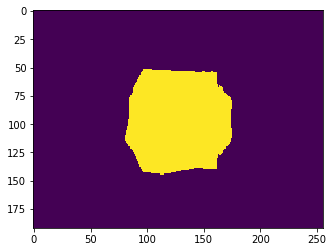

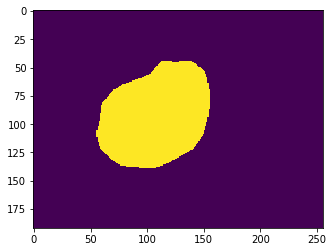

0.4167507171630859  step number is  3200  batch_size is  16
Currently on step 3300
the time is  1041.804327 

Avg Jacc is:


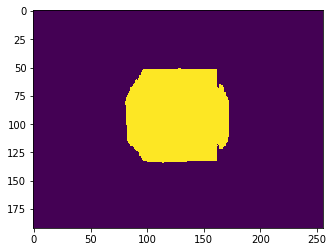

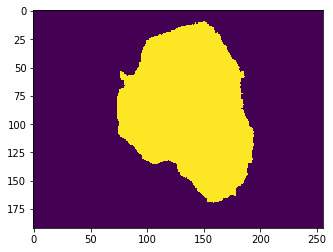

0.4126059312086839  step number is  3300  batch_size is  16
Currently on step 3400
the time is  1072.997862 

Avg Jacc is:


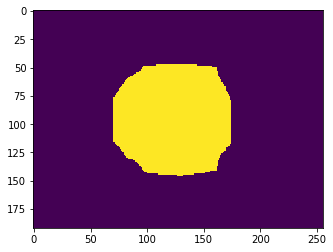

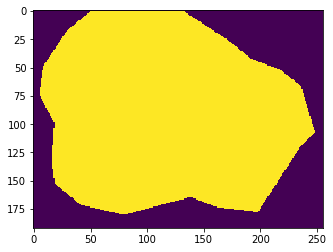

0.4247950920691857  step number is  3400  batch_size is  16
Currently on step 3500
the time is  1104.200861 

Avg Jacc is:


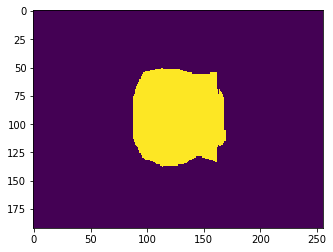

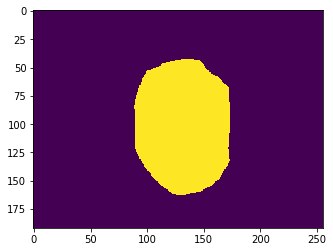

0.4210970658522386  step number is  3500  batch_size is  16
Currently on step 3600
the time is  1135.4355739999999 

Avg Jacc is:


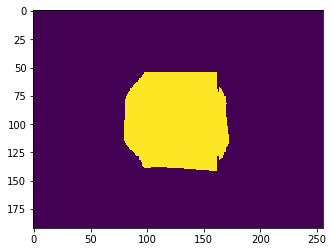

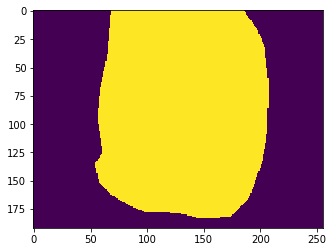

0.4161480243389423  step number is  3600  batch_size is  16
Currently on step 3700
the time is  1166.676307 

Avg Jacc is:


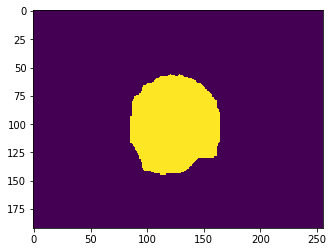

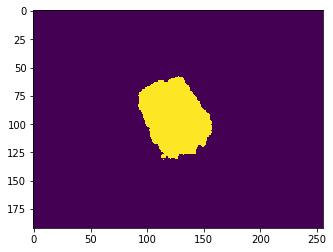

0.4180335705096905  step number is  3700  batch_size is  16
Currently on step 3800
the time is  1197.9262449999999 

Avg Jacc is:


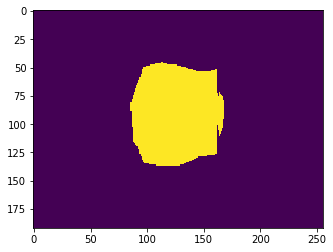

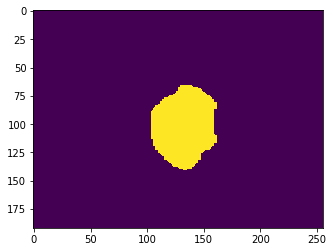

0.4201595012958233  step number is  3800  batch_size is  16
Currently on step 3900
the time is  1229.142674 

Avg Jacc is:


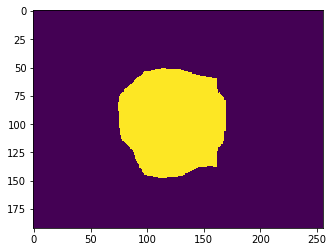

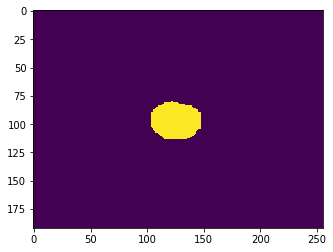

0.41564961946927587  step number is  3900  batch_size is  16
Currently on step 4000
the time is  1260.357385 

Avg Jacc is:


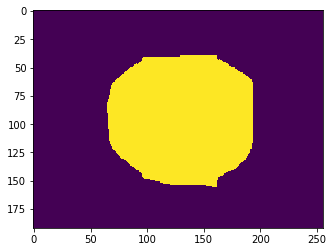

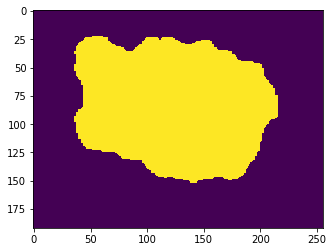

0.41241097083458533  step number is  4000  batch_size is  16
Currently on step 4100
the time is  1291.610445 

Avg Jacc is:


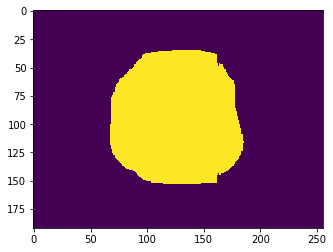

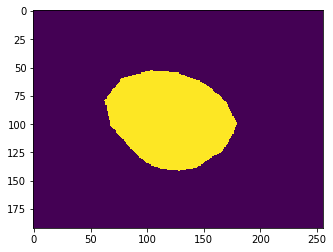

0.4176522475022536  step number is  4100  batch_size is  16
Currently on step 4200
the time is  1323.065427 

Avg Jacc is:


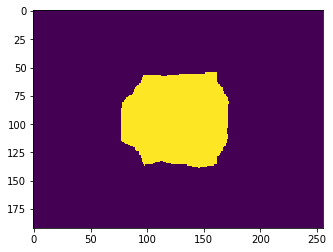

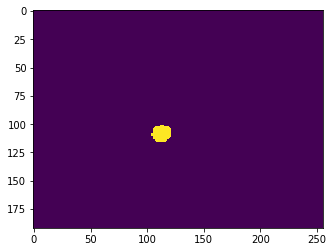

0.4164517329289363  step number is  4200  batch_size is  16
Currently on step 4300
the time is  1354.337662 

Avg Jacc is:


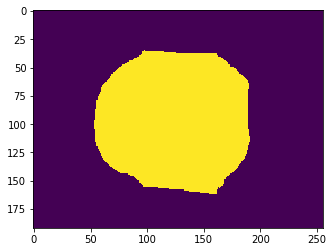

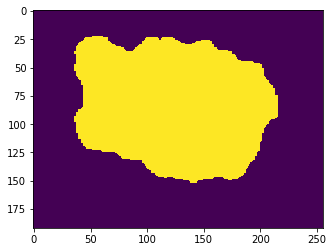

0.41857845599834737  step number is  4300  batch_size is  16
Currently on step 4400
the time is  1385.632821 

Avg Jacc is:


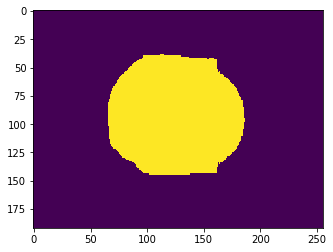

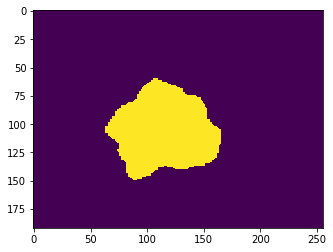

0.416844235933744  step number is  4400  batch_size is  16
Currently on step 4500
the time is  1416.876197 

Avg Jacc is:


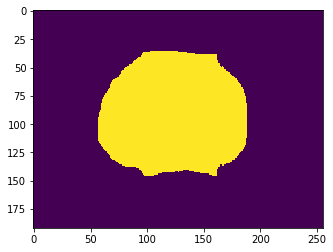

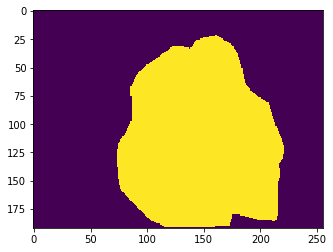

0.4186444796048678  step number is  4500  batch_size is  16
Currently on step 4600
the time is  1448.098243 

Avg Jacc is:


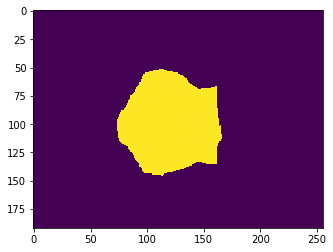

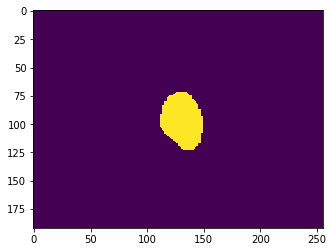

0.4018759507399339  step number is  4600  batch_size is  16
Currently on step 4700
the time is  1479.3983329999999 

Avg Jacc is:


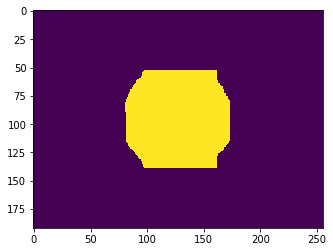

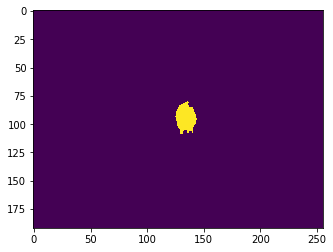

0.4148389376126803  step number is  4700  batch_size is  16
Currently on step 4800
the time is  1510.690425 

Avg Jacc is:


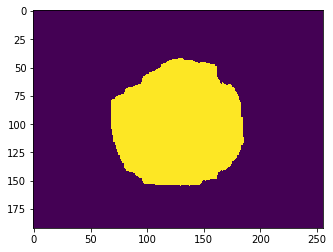

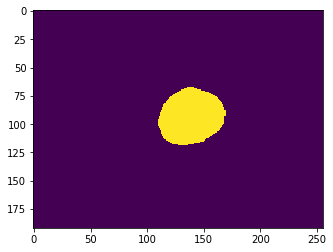

0.41980596689077526  step number is  4800  batch_size is  16
Currently on step 4900
the time is  1541.9202249999998 

Avg Jacc is:


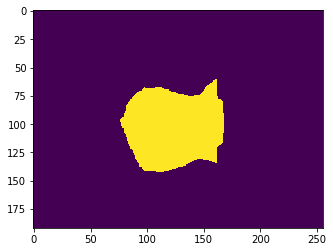

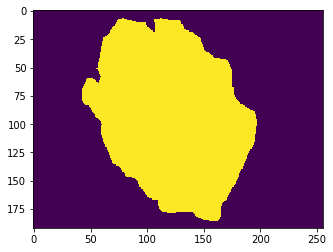

0.40174815838153544  step number is  4900  batch_size is  16
Currently on step 5000
the time is  1573.157823 

Avg Jacc is:


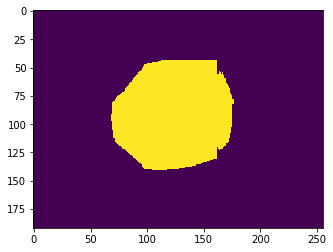

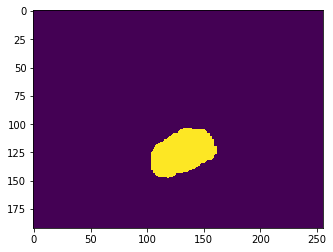

0.41184897789588343  step number is  5000  batch_size is  16
Currently on step 5100
the time is  1604.387982 

Avg Jacc is:


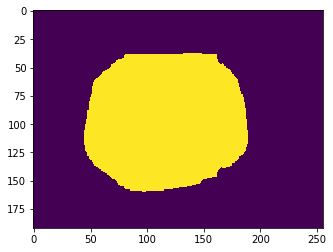

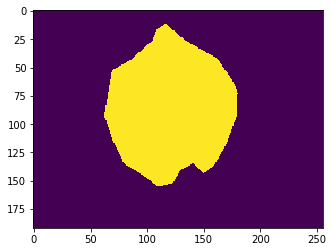

0.41929908165564905  step number is  5100  batch_size is  16
Currently on step 5200
the time is  1635.621263 

Avg Jacc is:


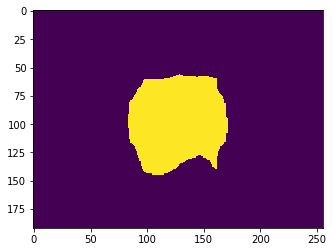

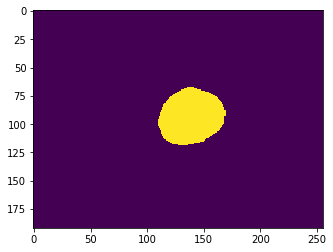

0.40710167518028845  step number is  5200  batch_size is  16
Currently on step 5300
the time is  1666.938624 

Avg Jacc is:


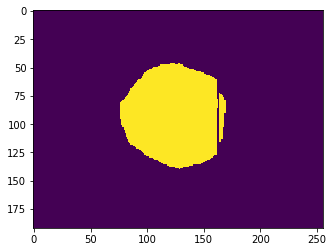

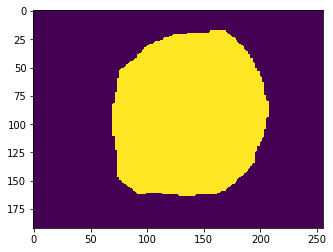

0.41260364239032454  step number is  5300  batch_size is  16
Currently on step 5400
the time is  1698.230187 

Avg Jacc is:


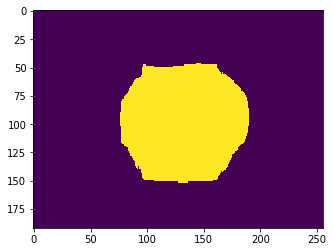

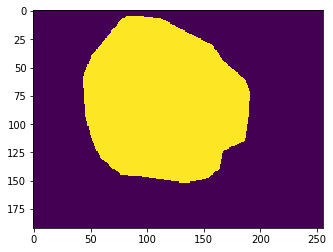

0.41745094886192907  step number is  5400  batch_size is  16
Currently on step 5500
the time is  1729.516564 

Avg Jacc is:


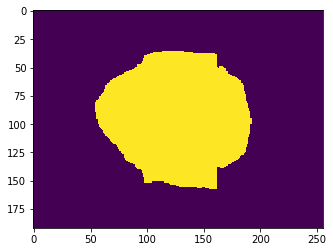

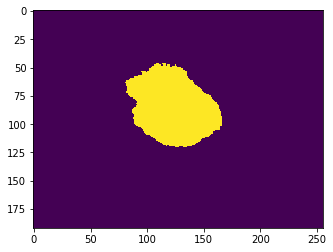

0.40113689716045675  step number is  5500  batch_size is  16
Currently on step 5600
the time is  1760.731532 

Avg Jacc is:


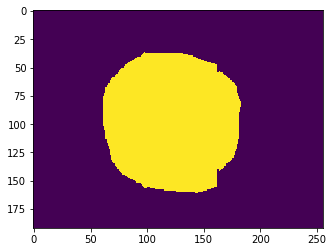

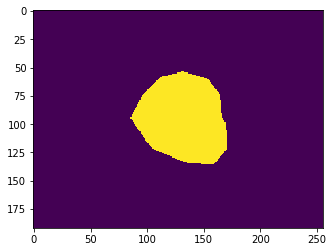

0.41223895733173077  step number is  5600  batch_size is  16
Currently on step 5700
the time is  1791.970935 

Avg Jacc is:


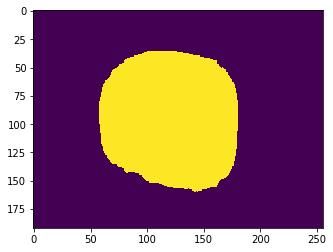

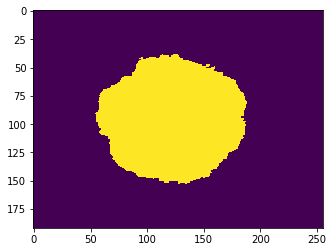

0.4115967970628005  step number is  5700  batch_size is  16
Currently on step 5800
the time is  1823.284682 

Avg Jacc is:


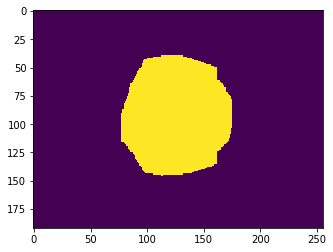

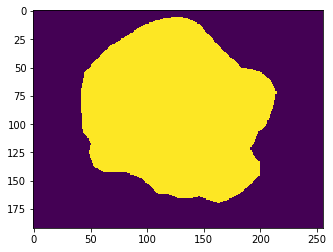

0.40691422682542067  step number is  5800  batch_size is  16
Currently on step 5900
the time is  1854.5734029999999 

Avg Jacc is:


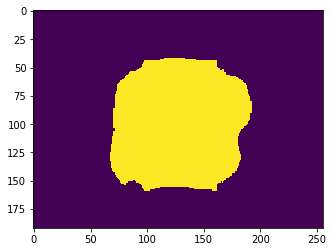

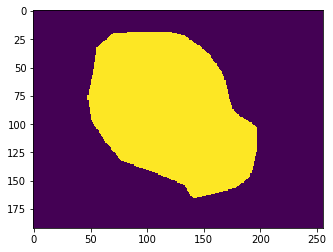

0.4175396552452674  step number is  5900  batch_size is  16
Currently on step 6000
the time is  1885.866431 

Avg Jacc is:


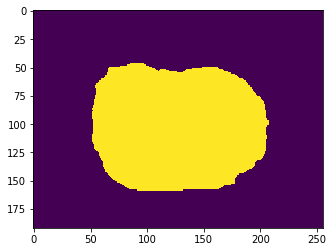

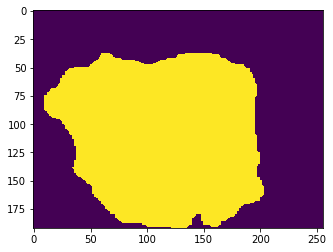

0.39328739459698014  step number is  6000  batch_size is  16
Currently on step 6100
the time is  1917.06717 

Avg Jacc is:


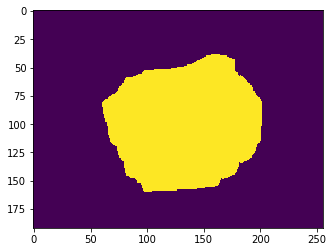

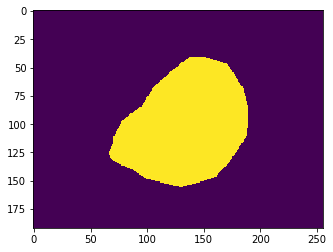

0.41248092651367185  step number is  6100  batch_size is  16
Currently on step 6200
the time is  1948.221147 

Avg Jacc is:


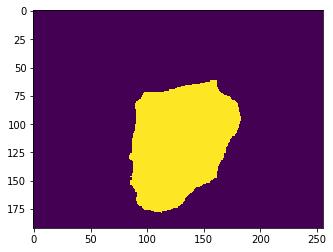

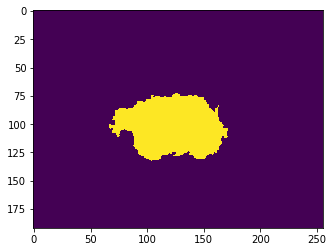

0.41413189814640927  step number is  6200  batch_size is  16
Currently on step 6300
the time is  1979.445043 

Avg Jacc is:


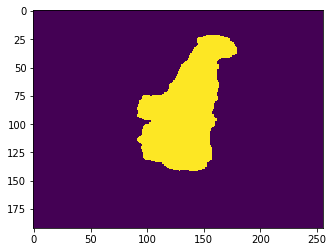

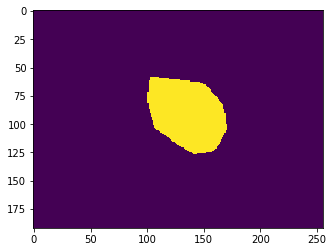

0.39021700345552884  step number is  6300  batch_size is  16
Currently on step 6400
the time is  2010.907025 

Avg Jacc is:


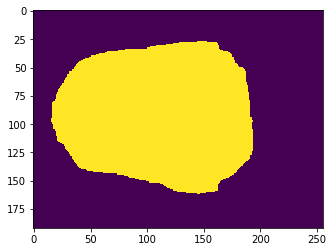

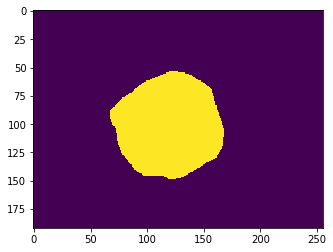

0.41146316528320315  step number is  6400  batch_size is  16
Currently on step 6500
the time is  2042.158045 

Avg Jacc is:


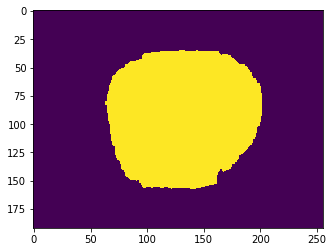

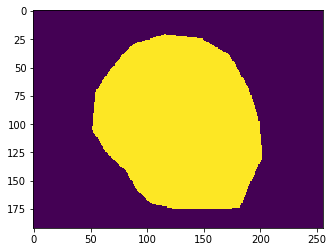

0.4047223604642428  step number is  6500  batch_size is  16
Currently on step 6600
the time is  2073.380619 

Avg Jacc is:


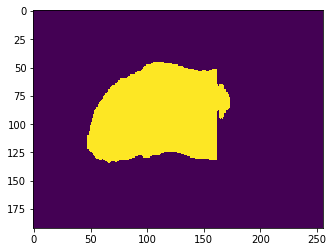

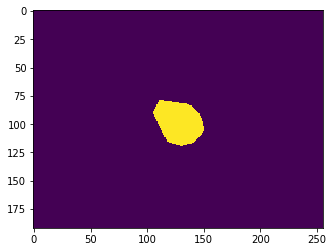

0.3956339909480168  step number is  6600  batch_size is  16
Currently on step 6700
the time is  2104.635885 

Avg Jacc is:


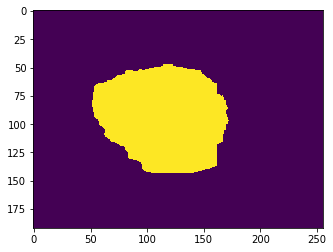

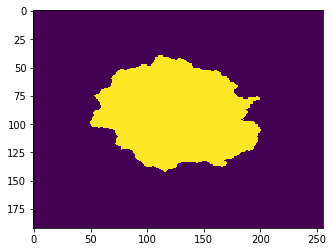

0.388448245708759  step number is  6700  batch_size is  16
Currently on step 6800
the time is  2135.880137 

Avg Jacc is:


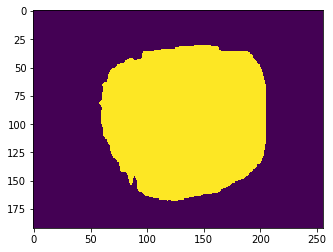

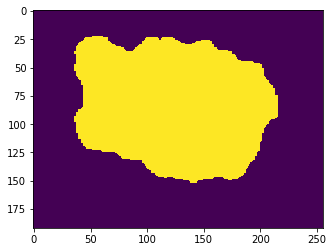

0.4012327634371244  step number is  6800  batch_size is  16
Currently on step 6900
the time is  2167.082429 

Avg Jacc is:


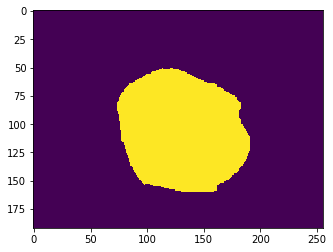

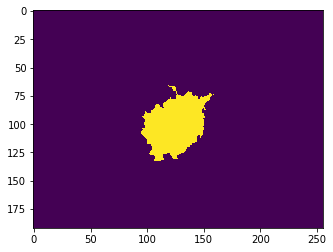

0.3634733640230619  step number is  6900  batch_size is  16
Currently on step 7000
the time is  2198.347452 

Avg Jacc is:


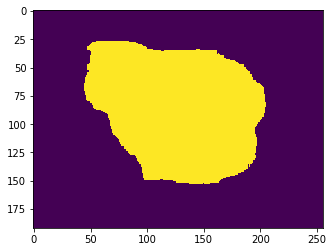

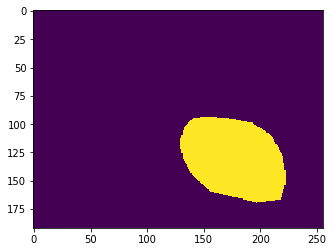

0.38605775099534256  step number is  7000  batch_size is  16
Currently on step 7100
the time is  2229.562506 

Avg Jacc is:


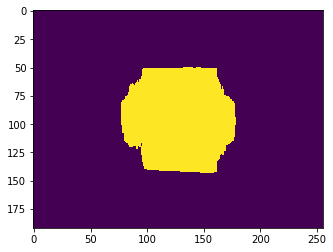

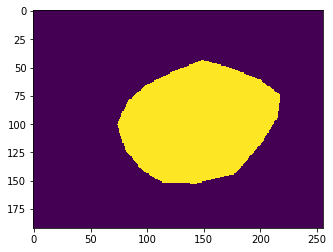

0.4046951587383564  step number is  7100  batch_size is  16
Currently on step 7200
the time is  2260.7769740000003 

Avg Jacc is:


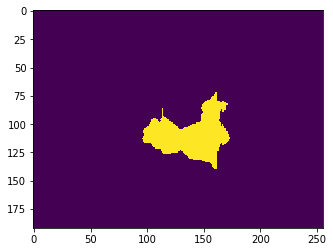

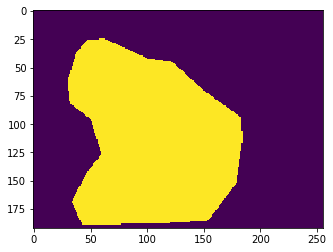

0.38683970524714545  step number is  7200  batch_size is  16
Currently on step 7300
the time is  2292.065703 

Avg Jacc is:


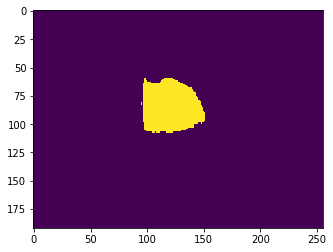

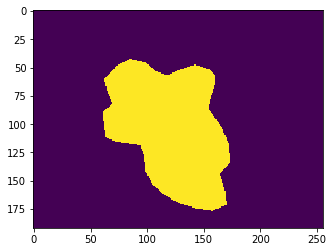

0.3817945627065805  step number is  7300  batch_size is  16
Currently on step 7400
the time is  2323.34513 

Avg Jacc is:


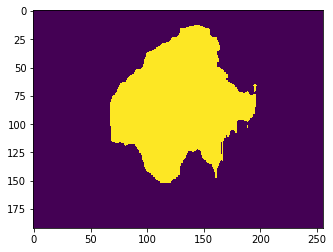

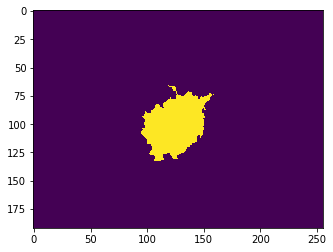

0.38559039189265326  step number is  7400  batch_size is  16
Currently on step 7500
the time is  2354.6368500000003 

Avg Jacc is:


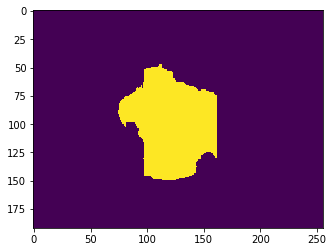

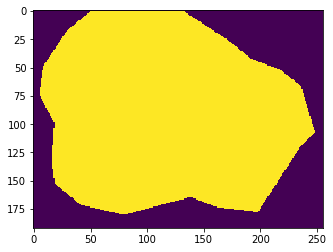

0.3596721355731671  step number is  7500  batch_size is  16
Currently on step 7600
the time is  2385.921726 

Avg Jacc is:


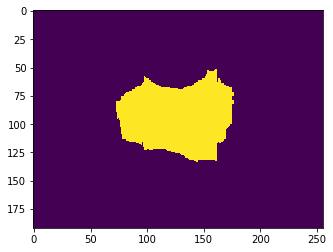

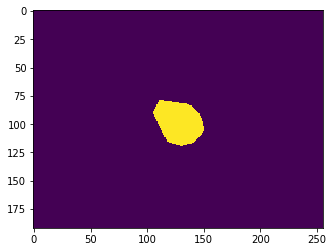

0.3985006479116587  step number is  7600  batch_size is  16
Currently on step 7700
the time is  2417.200721 

Avg Jacc is:


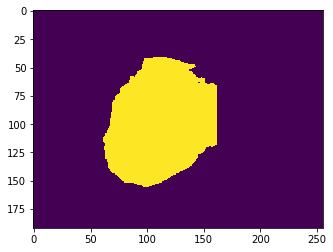

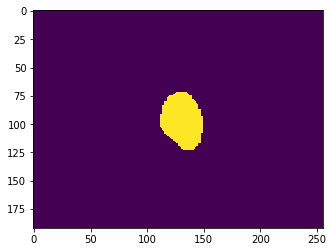

0.3841018383319561  step number is  7700  batch_size is  16
Currently on step 7800
the time is  2448.372216 

Avg Jacc is:


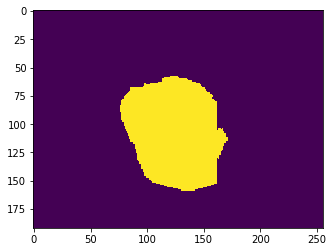

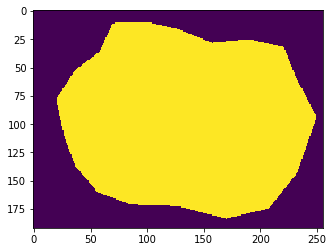

0.3571268521822416  step number is  7800  batch_size is  16
Currently on step 7900
the time is  2479.6384430000003 

Avg Jacc is:


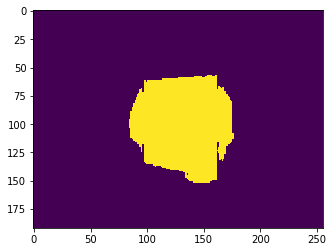

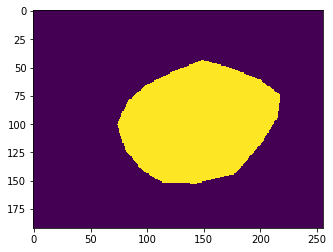

0.3955887134258564  step number is  7900  batch_size is  16
Currently on step 8000
the time is  2510.885056 

Avg Jacc is:


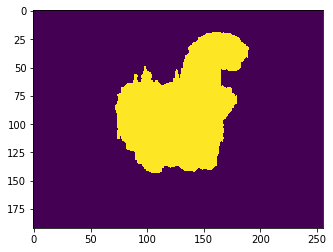

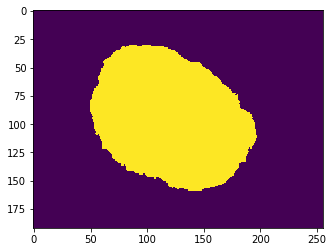

0.39424033531775843  step number is  8000  batch_size is  16
Currently on step 8100
the time is  2542.168263 

Avg Jacc is:


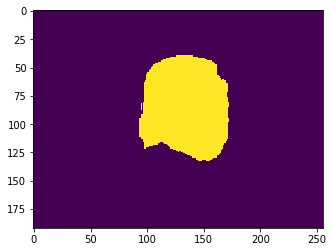

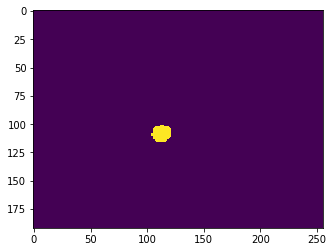

0.37323147700383114  step number is  8100  batch_size is  16
Currently on step 8200
the time is  2573.42504 

Avg Jacc is:


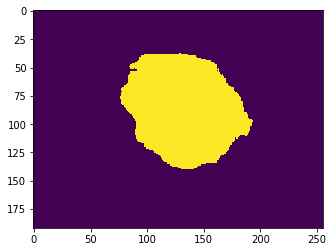

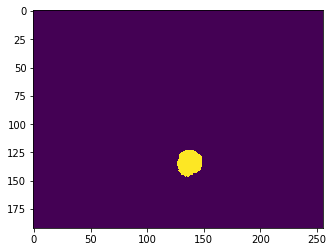

0.38660507202148436  step number is  8200  batch_size is  16
Currently on step 8300
the time is  2604.682616 

Avg Jacc is:


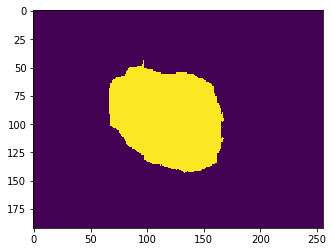

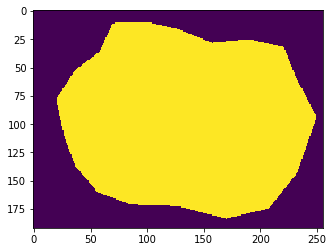

0.3346008007342999  step number is  8300  batch_size is  16
Currently on step 8400
the time is  2635.9472440000004 

Avg Jacc is:


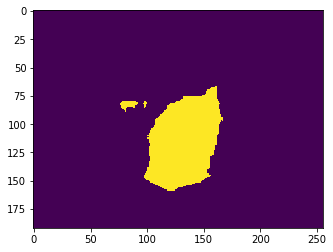

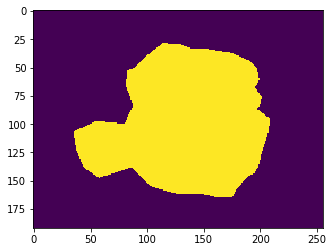

0.3497645451472356  step number is  8400  batch_size is  16
Currently on step 8500
the time is  2667.110997 

Avg Jacc is:


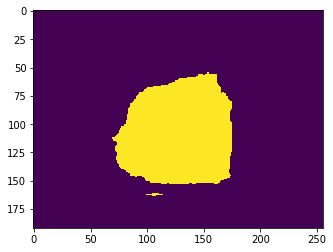

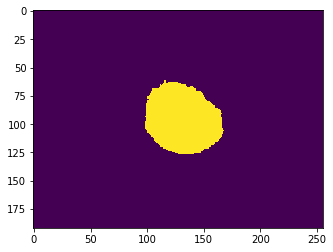

0.3798806410569411  step number is  8500  batch_size is  16
Currently on step 8600
the time is  2698.499069 

Avg Jacc is:


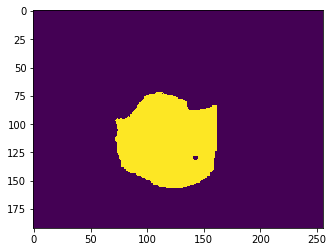

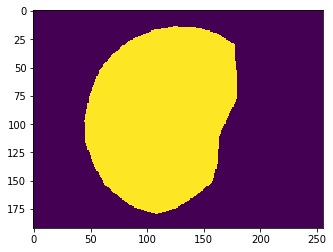

0.3521577688363882  step number is  8600  batch_size is  16
Currently on step 8700
the time is  2729.740018 

Avg Jacc is:


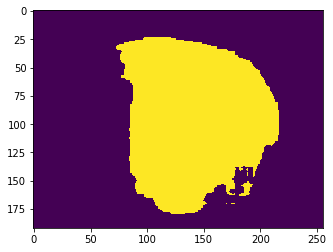

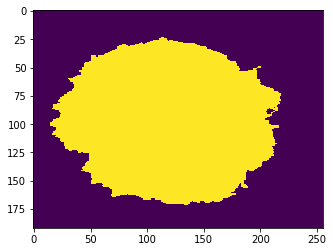

0.34424256544846754  step number is  8700  batch_size is  16
Currently on step 8800
the time is  2760.963791 

Avg Jacc is:


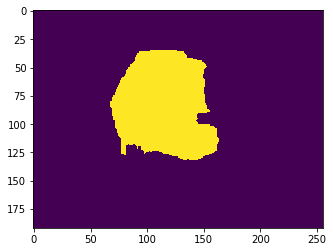

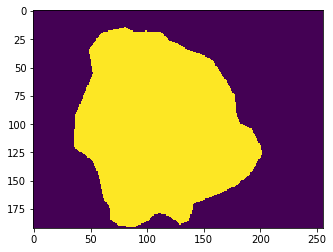

0.3615559504582332  step number is  8800  batch_size is  16


In [0]:
steps = 75815
import time
batch_size = 16
j_test = []
j_train = []

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    print("starting init")
    sess.run(init)
    print("done init")
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        #print(i)
        #print("\n")
        
        #print("batch training labels shape is ", batch_y.shape)
        #print("batch training labels type is ", batch_y.dtype)
        #print("batch training labels are ", batch_y)
        #print("batch training data are ", batch_x)
        #image = batch_y.reshape(-1,21,28)[5,:,:]
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5,hold_prob2:0.5})
        #print("batch training prediction are ", batch_y)
        #image_pred = sess.run(y_pred,feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0} ).reshape(-1,21,28)[5,:,:]
        #image_pred = np.round(1/(1 + np.exp(-image_pred)))
        
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print("the time is ", time.clock() - start_time, "\n")
             #print("mel i is ", mel.i)
             #plt.imshow(image)
             #plt.show()
             #plt.imshow(image_pred)
             #plt.show()
            
            #print('Currently on step {}'.format(i))
            #print('Accuracy is:')
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            #acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            
            ####use with cross entropy####
            #pred = tf.round(1/(1 + tf.exp(-tf.reshape(y_pred, [-1,48,64]))))
            #true = tf.reshape(y_true, [-1,48,64])
          
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))  ###REPLACE THIS LINE TO INCLUDE JACARD INDEX####
            pred_o = tf.math.round(pred)
            true_o = tf.math.round(true)
            
        


            intersect_o = tf.reduce_sum(tf.cast(true*pred_o, tf.float32), axis = [1,2])
            union_o = tf.reduce_sum(tf.cast(pred_o, tf.float32), axis = [1,2]) + tf.reduce_sum(tf.cast(true, tf.float32), axis = [1,2]) - intersect  #think this has an error
            jacc_o = intersect_o/union_o
            
            
            J_out = sess.run([jacc_o],feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0,hold_prob2:1.0})
            J_train = np.sum(J_out[0])/J_out[0].shape[0]
            j_train += [J_train]
            
            #acc = tf.reduce_mean(tf.cast(intersect,tf.float32))
            #print("test labels shape is ", mel.test_labels.shape)
            #print("\n")
            
            print('Avg Jacc is:')
            J_out = sess.run([jacc_o, pred_o, true_o],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
           
           
            rn = int(np.random.random()*J_out[1].shape[0])
           
            plt.imshow(J_out[1][rn, :, :])
            plt.show()
            plt.imshow(J_out[2][rn, :, :])
            plt.show()
            ##it cannot evaluate over the test set, the test set is too large...reduce size of test set
            
            J_test = np.sum(J_out[0])/J_out[0].shape[0]
            j_test += [J_test]
            
            print(J_test, " step number is ",  i, " batch_size is ", batch_size)
            #print("intersection is", J_out[2], "union is", J_out[3], "\n", "y_pred is ", J_out[4], "true is ", J_out[5], "sum_pred =",  J_out[6], "sum_true", J_out[7])
            #if i == 500:
                #batch_size = 20
            #if i == 25000:
                #batch_size = 200
            
            #print out Jacc for training set and test set, Save Jacc and entropy to variable,
            #print out step number
            
            #use larger pics
            #print out and analyse cross entropy
            #run with full training batch for several iterations
            #pred = sess.run(pred,feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})
            
           
        if i == steps - 1:
            pred_mel = sess.run([pred],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
            pred_pigment = sess.run([pred],feed_dict={x:pigs,hold_prob:1.0,hold_prob2:1.0})
            
        #save_path = saver.save(sess, "./model.ckpt")
        
        

In [0]:
J_out[1][1].shape

In [1]:
j_train = np.array(j_train)
j_test = np.array(j_test)
plt.plot(j_train)

NameError: ignored

In [0]:
plt.plot(j_test)

In [0]:
plt.hist(J_out[0])

## Great Job!

In [0]:
plt.imshow(pred_pigment[0][5,:,:])
plt.show()

In [0]:
pigs.shape

In [0]:
pred_pigment[0].shape

In [0]:
plt.imshow(pigment_image_show)
plt.show()

In [0]:
mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
mask[:,:,0] = pred_pigment[0][0,:,:]
mask[:,:,1] = pred_pigment[0][0,:,:]
mask[:,:,2] = pred_pigment[0][0,:,:]
#mask = 1-mask
#mask = mask.astype(int)

image = pigment_image_show
#image[mask] = 0
image2 = image*mask*255
image1 = image*(1- mask)*255


In [0]:
plt.imshow(image2)
plt.show()

In [0]:
plt.imshow(image1)
plt.show()

In [0]:
image2[:,:,0].shape

In [0]:
red = image2[:,:,0].reshape(-1)

In [0]:
plt.hist(red, bins = 500, range = (0.1, red.max()))

In [0]:
plt.show()

In [0]:
a2 = np.average(red, weights = mask[:,:,0].reshape(-1))

In [0]:
a2

In [0]:
mask[0].shape

In [0]:
red_norm = image1[:,:,0].reshape(-1)

In [0]:
plt.hist(red_norm, bins = 500, range = (0.1, red_norm.max()))

In [0]:
plt.show()

In [0]:
mask_inv = 1-mask

In [0]:
a1 = np.average(red_norm, weights =mask_inv[:,:,0].reshape(-1))

In [0]:
mask_inv.shape

In [0]:
a1

In [0]:
a1 - a2

In [0]:
blue = image2[:,:,2].reshape(-1)

In [0]:
blue_norm = image1[:,:,2].reshape(-1)

In [0]:
plt.hist(blue, bins = 500, range = (0.1, blue.max()))
plt.show()

In [0]:
plt.hist(blue_norm, bins = 500, range = (0.1, blue_norm.max()))
plt.figure()
plt.show()

In [0]:
def measure_progress(pigs,masks):
    blue_pigs = []
    blue_norms = []
    imagesp = []
    imagesn = []
    i = 0
    for pig in pigs:
        mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
        mask[:,:,0] = pred_pigment[0][i,:,:]
        mask[:,:,1] = pred_pigment[0][i,:,:]
        mask[:,:,2] = pred_pigment[0][i,:,:]
        mask_inv = 1- mask
        imagep = pig*mask*255
        imagen = pig*(1- mask)*255
        imagesp += [imagep]
        imagesn += [imagen]
        blue_norm = imagen[:,:,2].reshape(-1)
        blue_pig = imagep[:,:,2].reshape(-1)
        an = np.average(blue_norm, weights =mask_inv[:,:,2].reshape(-1))
        ap = np.average(blue_pig, weights =mask[:,:,2].reshape(-1))
        blue_pigs += [ap]
        blue_norms += [an]
        i+=1
    blue_pigs = np.array(blue_pigs)
    blue_norms = np.array(blue_norms)
    return(blue_pigs, blue_norms, imagesp, imagesn)

In [0]:
pigmented, normal, imagesp, imagesn = measure_progress(pigs,pred_pigment)

In [0]:
J_out[1].shape

In [0]:
pigmented

In [0]:
normal

In [0]:
plt.plot(normal - pigmented)

In [0]:
plt.plot(normal)

In [0]:
plt.plot(pigmented)

In [0]:
plt.imshow(imagesp[0])

In [0]:
plt.imshow(imagesp[1])

In [0]:
plt.imshow(imagesp[2])

In [0]:
plt.imshow(imagesp[3])

In [0]:
plt.imshow(imagesp[4])

In [0]:
plt.imshow(imagesp[5])

In [0]:
plt.imshow(imagesp[6])

In [0]:
plt.imshow(imagesp[7])

In [0]:
plt.imshow(imagesp[8])

In [0]:
plt.imshow(imagesp[9])

In [0]:
plt.imshow(imagesp[10])

In [0]:
pigmented[0]

In [0]:
pigmented[10]

In [0]:
plt.imshow(imagesp[0])

In [0]:
plt.imshow(imagesp[11])

In [0]:
plt.imshow(imagesp[12])

In [0]:
plt.imshow(imagesp[13])

In [0]:
plt.imshow(imagesp[14])

In [0]:
plt.imshow(imagesp[15])

In [0]:
plt.imshow(imagesp[16])

In [0]:
plt.imshow(imagesp[17])

In [0]:
plt.imshow(imagesp[18])

In [0]:
plt.imshow(imagesp[19])

In [0]:
plt.imshow(imagesp[20])

In [0]:
plt.imshow(imagesp[21])

In [0]:
plt.imshow(imagesp[22])

In [0]:
plt.imshow(imagesp[23])

In [0]:
plt.imshow(imagesp[24])

In [0]:
plt.imshow(imagesp[25])

In [0]:
plt.imshow(imagesp[26])

In [0]:
plt.imshow(imagesp[27])

In [0]:
plt.imshow(imagesp[0])

In [0]:
test = normal - pigmented

In [0]:
test = np.hstack([test[0:2], test[4:8], test[9:21], test[22:26], test[27]])

In [0]:
plt.plot(test)

In [0]:
filenames

In [0]:
normal = np.hstack([normal[0:2], normal[12], normal[21:28], normal[2:12], normal[13:20]])

In [0]:
pigmented = np.hstack([pigmented[0:2], pigmented[12], pigmented[21:28], pigmented[2:12], pigmented[13:20]])

In [0]:
plt.plot(normal-pigmented)

In [0]:
## 26, 21, 2, 3, 8 -> 8,3,10,11,16

In [0]:
normal.shape

In [0]:
normal = np.hstack([normal[0:3], normal[4:8], normal[9], normal[12:16], normal[17:27]])

In [0]:
pigmented = np.hstack([pigmented[0:3], pigmented[4:8], pigmented[9], pigmented[12:16], pigmented[17:27]])

In [0]:
new_files_names = np.hstack([filenames[0:3], filenames[4:8], filenames[9], filenames[12:16], filenames[17:27]])

In [0]:
plt.plot(normal-pigmented)

In [0]:
plt.plot(pigmented)

In [0]:
plt.plot(normal)

In [0]:
plt.plot(pigmented/normal)

In [0]:
plt.plot((normal - pigmented)/normal)

In [0]:
new_files_names

In [0]:
plt.imshow(imagesp[12])